<a href="https://colab.research.google.com/github/giyuntf2/KBDB2/blob/main/20220612.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install seaborn
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq
!pip install Jinja2
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from google.colab import files

uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [301]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub_mission = pd.read_csv('sample_submission.csv')

#date column 저장
train_date_col = train['date']
test_date_col = test['date']

#date drop
train.drop(['date'], axis=1, inplace=True)
test.drop(['date'], axis=1, inplace=True)

In [297]:
train.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

In [298]:
test.isnull().sum()

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64

# 결측치 처리

In [299]:
#결측치 처리, 강수량은 0으로, sunshine_sum은 평균값으로. 

def rain_sun(df):
  df['precipitation'] = df['precipitation'].fillna(0)
  df['sunshine_sum'] = df['sunshine_sum'].fillna(df['sunshine_sum'].mean()) 

  return df

train = rain_sun(train)
test = rain_sun(test)

In [300]:
train

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,0.0,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,0.0,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,0.0,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,0.0,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,0.0,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2020-12-27,0.0,5.8,10.0,1.4,70.0,42.0,62.9,5.9,61.5,1.8,2.8,37103
1091,2020-12-28,1.3,6.7,11.4,4.2,66.0,44.0,72.1,8.0,83.3,1.4,3.1,46912
1092,2020-12-29,0.2,0.1,4.3,-6.2,69.0,46.0,70.8,0.0,0.0,2.9,6.1,35747
1093,2020-12-30,0.0,-10.9,-6.2,-12.9,39.0,15.0,55.5,8.3,86.5,4.1,6.2,22488


# 다중 대체 방식

In [275]:
col_name = copy_train.columns.to_list()

In [276]:
col_name = copy_train.columns.to_list()

train_multimp = pd.DataFrame(IterativeImputer(random_state=42).fit_transform(copy_train))
train_multimp.columns = col_name

#Non-Scaler용 copy본 만들어두기
train_multimp_non = train_multimp.copy()

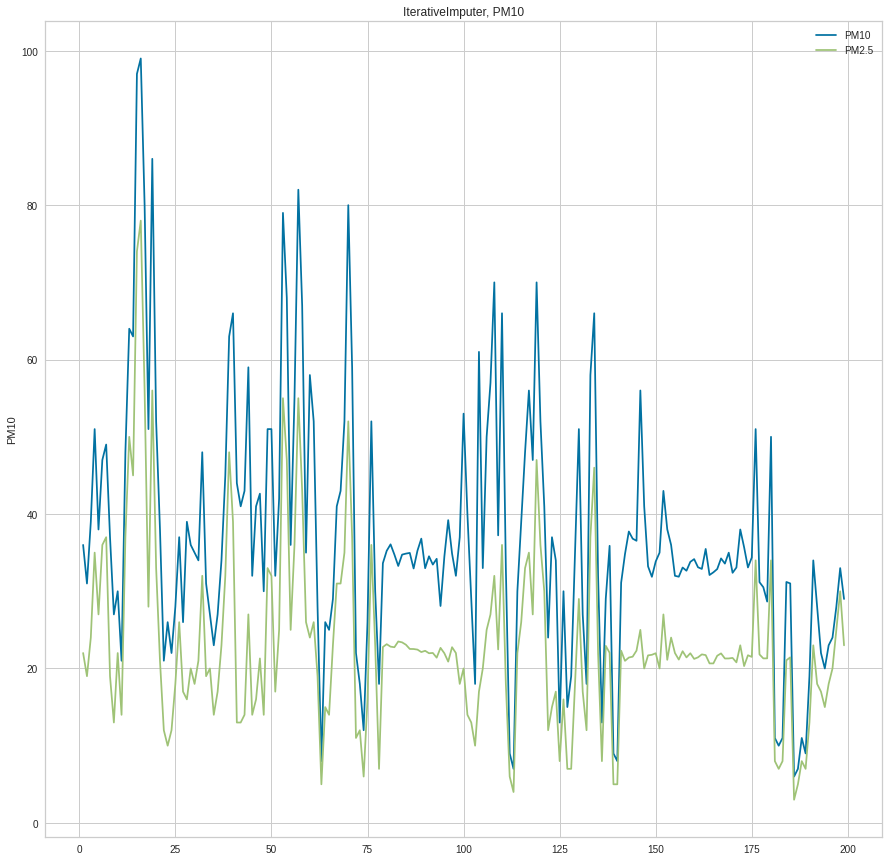

In [277]:
plt.figure(figsize=(15,15))

sns.lineplot(train_multimp.iloc[1:200].index, 
             train_multimp.iloc[1:200]['PM10'],
             label = 'PM10')
sns.lineplot(train_multimp.iloc[1:200].index, 
             train_multimp.iloc[1:200]['PM2.5'], 
             label = 'PM2.5')

plt.legend()
plt.title('IterativeImputer, PM10')
plt.show()

# 다중대체 방식 이후 새로운 Column 생성. (불쾌지수)


In [278]:
def discomport_idx(temp_mean, humid):
    humid = humid / 100
    
    discomfort = ((9/5) * temp_mean) - 0.55 * (1 - humid) * (((9/5) * temp_mean) - 26) + 32
    return round(discomfort, 1)

In [279]:
train_multimp['discomport_idx'] = [0] * len(train_multimp)

for i in range(len(train_multimp)):
    train_multimp.discomport_idx[i] = discomport_idx(train_multimp.temp_mean[i], 
                                                     train_multimp.humidity[i])

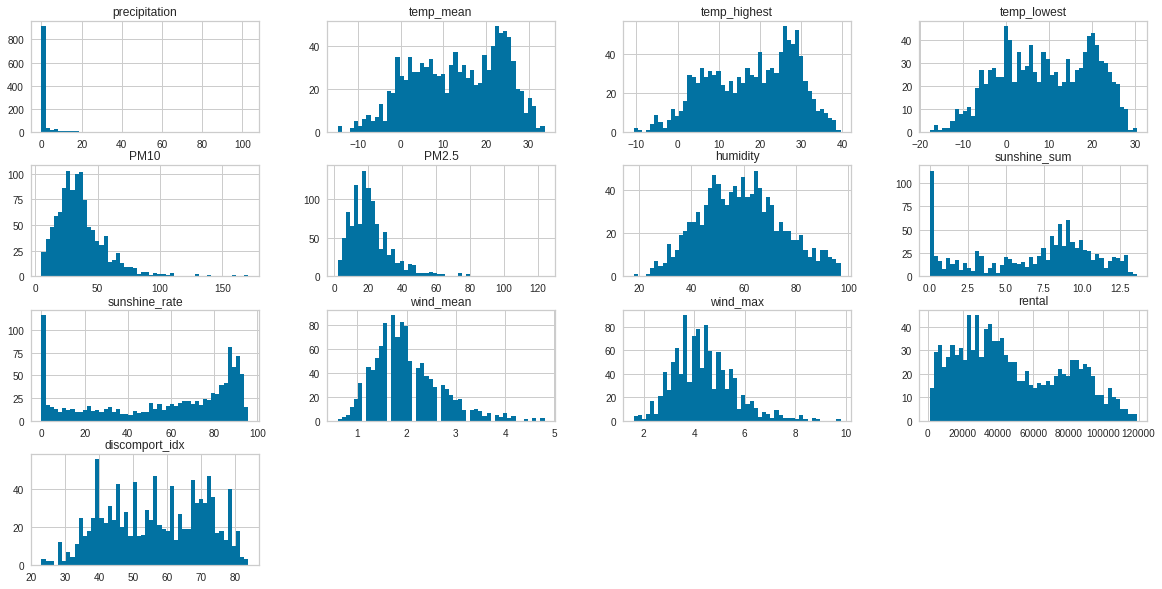

In [280]:
train_multimp.hist(bins=50, figsize=(20,10))
plt.show()

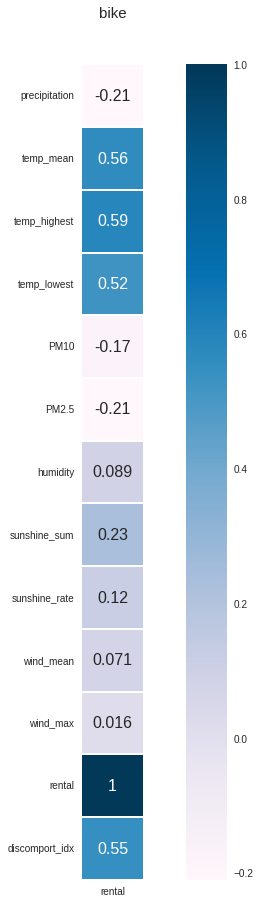

In [281]:
colormap = plt.cm.PuBu #컬러
plt.figure(figsize=(15, 15)) #사이즈
plt.title("bike", y = 1.05, size = 15) 
sns.heatmap(copy_train_multimp.corr()[['rental']], linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16}) 
plt.show()

# BaseLine 지정

In [ ]:
X = copy_train_multimp.drop(['rental'], axis=1)
y = copy_train_multimp['rental']

In [ ]:
import numpy as np

def Baseline_NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

def Baseline_MAE(true, pred):
    score = np.mean(np.abs(true - pred))
    return score

In [ ]:
pred = train['rental'].mean()
true = train['rental']

Baseline_NMAE(pred, true)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

y_hat = model.predict(X)

#NMAE, MAE Score

NMAE_score = Baseline_NMAE(y, y_hat)
MAE_score = Baseline_MAE(y, y_hat)

print(f'Baseline NMAE : {NMAE_score}')
print(f'Baseline MAE : {MAE_score}')

Baseline NMAE : 0.6378460755484241
Baseline MAE : 16783.415506925223


# Copy

In [273]:
copy_train = pd.get_dummies(train)
copy_test = pd.get_dummies(test)

# KNN Imputer

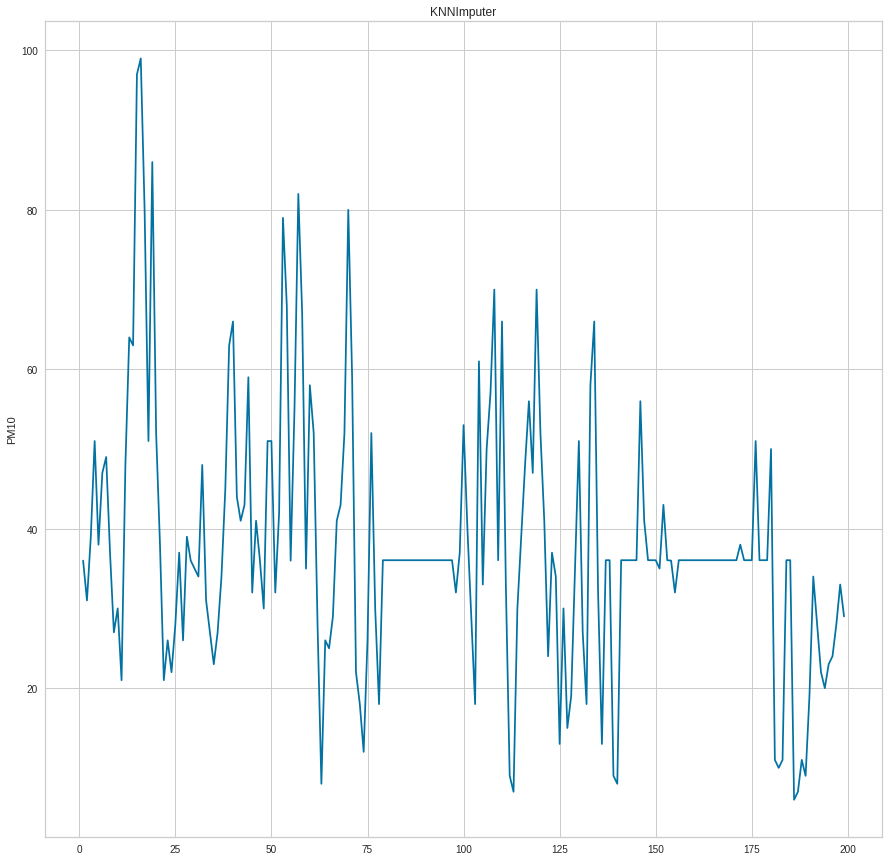

In [25]:
#KNN Imputer

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=50, )

copy_train['PM10'] = imputer.fit_transform(copy_train[['PM10']])

plt.figure(figsize=(15,15))
sns.lineplot(copy_train.iloc[1:200].index, copy_train.iloc[1:200]['PM10'])
plt.title('KNNImputer')
plt.show()

#BackFill 방식 Imputer

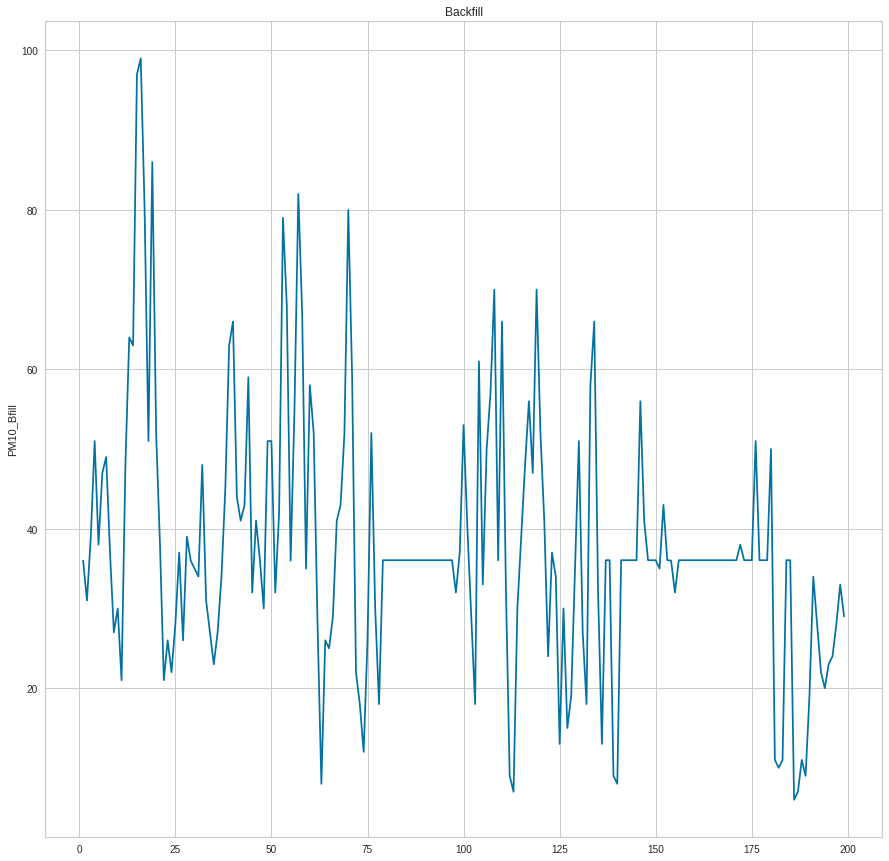

In [26]:
#BACKFILL 방식의 Imputer

plt.figure(figsize=(15,15))
copy_train['PM10_Bfill'] = pd.DataFrame(copy_train['PM10'].fillna(method='bfill'))
sns.lineplot(copy_train.iloc[1:200].index, copy_train.iloc[1:200]['PM10_Bfill'])
plt.title('Backfill')
plt.show()

# Modeling
## Pycaret을 먼저 이용
### Standard Scaling해주기.

# 3가지 경우의 수로 Pycaret 진단.

  -Scaling Drop

  -Non-Scaling Drop

  -No-Drop No scaling

# SHAP을 이용한 Feature Selection



In [32]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import shap


In [282]:
def drop_cols(df):
    df = df.drop(['humidity', 'wind_max', 'wind_mean'], axis=1)
    return df

train_multimp_drop = drop_cols(train_multimp)

In [283]:
train_multimp_drop

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,sunshine_sum,sunshine_rate,rental,discomport_idx
0,0.0,-1.3,3.8,-5.1,34.0,17.0,8.3,86.5,4950.0,39
1,0.0,-1.8,1.8,-4.3,36.0,22.0,7.9,82.3,7136.0,38
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,8.6,88.7,7156.0,34
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,6.2,63.9,7102.0,34
4,0.0,-3.0,1.6,-5.6,51.0,35.0,8.2,84.5,7705.0,35
...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,5.9,61.5,37103.0,45
1091,1.3,6.7,11.4,4.2,66.0,44.0,8.0,83.3,46912.0,46
1092,0.2,0.1,4.3,-6.2,69.0,46.0,0.0,0.0,35747.0,36
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,8.3,86.5,22488.0,23


In [34]:
#from sklearn.model_selection import train_test_split
#X = copy_train_multimp.drop(['rental'], axis=1)
#y = copy_train_multimp['rental']
#X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [284]:
from sklearn.preprocessing import RobustScaler, StandardScaler

new_col = train_multimp.columns.to_list()

def std_scaling(df):
    scaling_features = ['precipitation', 'sunshine_sum', 'sunshine_rate']

    std_scaler = StandardScaler()
    df.loc[:, scaling_features] = std_scaler.fit_transform(df[scaling_features])

    df = pd.DataFrame(df)
    df.columns = new_col

    return df

In [285]:
train_multimp_scaled = std_scaling(train_multimp)

In [286]:
#Scaling Drop
train_multimp_scaled

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,discomport_idx
0,-0.292954,-1.3,3.8,-5.1,34.0,17.0,39.1,0.384267,0.921466,1.4,3.8,4950.0,39
1,-0.292954,-1.8,1.8,-4.3,36.0,22.0,42.0,0.283363,0.793470,1.8,4.9,7136.0,38
2,-0.292954,-4.7,-0.4,-7.1,31.0,19.0,42.3,0.459944,0.988511,2.2,3.5,7156.0,34
3,-0.292954,-4.7,-0.7,-8.7,39.0,24.0,43.0,-0.145477,0.232729,1.4,3.5,7102.0,34
4,-0.292954,-3.0,1.6,-5.6,51.0,35.0,48.4,0.359041,0.860516,1.7,3.6,7705.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.292954,5.8,10.0,1.4,70.0,42.0,62.9,-0.221155,0.159589,1.8,2.8,37103.0,45
1091,-0.183892,6.7,11.4,4.2,66.0,44.0,72.1,0.308589,0.823946,1.4,3.1,46912.0,46
1092,-0.276175,0.1,4.3,-6.2,69.0,46.0,70.8,-1.709482,-1.714627,2.9,6.1,35747.0,36
1093,-0.292954,-10.9,-6.2,-12.9,39.0,15.0,55.5,0.384267,0.921466,4.1,6.2,22488.0,23


In [287]:
#Non-Scaling Drop
train_multimp_drop

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,sunshine_sum,sunshine_rate,rental,discomport_idx
0,0.0,-1.3,3.8,-5.1,34.0,17.0,8.3,86.5,4950.0,39
1,0.0,-1.8,1.8,-4.3,36.0,22.0,7.9,82.3,7136.0,38
2,0.0,-4.7,-0.4,-7.1,31.0,19.0,8.6,88.7,7156.0,34
3,0.0,-4.7,-0.7,-8.7,39.0,24.0,6.2,63.9,7102.0,34
4,0.0,-3.0,1.6,-5.6,51.0,35.0,8.2,84.5,7705.0,35
...,...,...,...,...,...,...,...,...,...,...
1090,0.0,5.8,10.0,1.4,70.0,42.0,5.9,61.5,37103.0,45
1091,1.3,6.7,11.4,4.2,66.0,44.0,8.0,83.3,46912.0,46
1092,0.2,0.1,4.3,-6.2,69.0,46.0,0.0,0.0,35747.0,36
1093,0.0,-10.9,-6.2,-12.9,39.0,15.0,8.3,86.5,22488.0,23


In [288]:
#No Scaling, No drop
train_multimp

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental,discomport_idx
0,-0.292954,-1.3,3.8,-5.1,34.0,17.0,39.1,0.384267,0.921466,1.4,3.8,4950.0,39
1,-0.292954,-1.8,1.8,-4.3,36.0,22.0,42.0,0.283363,0.793470,1.8,4.9,7136.0,38
2,-0.292954,-4.7,-0.4,-7.1,31.0,19.0,42.3,0.459944,0.988511,2.2,3.5,7156.0,34
3,-0.292954,-4.7,-0.7,-8.7,39.0,24.0,43.0,-0.145477,0.232729,1.4,3.5,7102.0,34
4,-0.292954,-3.0,1.6,-5.6,51.0,35.0,48.4,0.359041,0.860516,1.7,3.6,7705.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,-0.292954,5.8,10.0,1.4,70.0,42.0,62.9,-0.221155,0.159589,1.8,2.8,37103.0,45
1091,-0.183892,6.7,11.4,4.2,66.0,44.0,72.1,0.308589,0.823946,1.4,3.1,46912.0,46
1092,-0.276175,0.1,4.3,-6.2,69.0,46.0,70.8,-1.709482,-1.714627,2.9,6.1,35747.0,36
1093,-0.292954,-10.9,-6.2,-12.9,39.0,15.0,55.5,0.384267,0.921466,4.1,6.2,22488.0,23


In [262]:
#Scaling Drop

from pycaret.regression import * 
import jinja2

reg = setup(train_multimp_scaled, target='rental', train_size=0.8)
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13037.4857,2.802598e+08,16731.2193,0.6823,0.4849,0.4488,3.851
gbr,Gradient Boosting Regressor,13763.0478,3.042911e+08,17417.1375,0.6572,0.4935,0.4845,0.230
rf,Random Forest Regressor,13976.7898,3.138734e+08,17687.9971,0.6452,0.4989,0.4847,0.821
lightgbm,Light Gradient Boosting Machine,14131.5913,3.292400e+08,18127.5218,0.6278,0.5036,0.4755,0.311
et,Extra Trees Regressor,14304.7564,3.335332e+08,18240.8828,0.6222,0.5104,0.5060,0.619
xgboost,Extreme Gradient Boosting,14255.0202,3.463069e+08,18571.5564,0.6092,0.5507,0.4833,0.717
ada,AdaBoost Regressor,15876.2656,3.727723e+08,19279.3473,0.5780,0.5862,0.6737,0.143
knn,K Neighbors Regressor,16355.0526,4.275811e+08,20645.5387,0.5145,0.5870,0.6523,0.084
ridge,Ridge Regression,17913.8027,4.813458e+08,21916.8078,0.4564,0.5816,0.6551,0.057
lasso,Lasso Regression,17914.6359,4.815682e+08,21921.4990,0.4562,0.5820,0.6559,0.042


In [263]:
#Non-Scaling Drop

reg = setup(train_multimp_drop, target='rental', train_size=0.8)
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,13104.5134,2.771436e+08,16620.4751,0.6685,0.4827,0.4660,2.976
gbr,Gradient Boosting Regressor,13831.0483,3.002658e+08,17287.6409,0.6417,0.4977,0.4956,0.144
lightgbm,Light Gradient Boosting Machine,13495.7385,3.003930e+08,17315.0670,0.6400,0.4889,0.4685,0.153
rf,Random Forest Regressor,13851.6179,3.034794e+08,17392.6107,0.6361,0.5001,0.5006,0.659
et,Extra Trees Regressor,14414.9778,3.282735e+08,18092.5667,0.6060,0.5116,0.5126,0.508
xgboost,Extreme Gradient Boosting,14204.6114,3.422049e+08,18474.3268,0.5886,0.5125,0.4859,0.448
ada,AdaBoost Regressor,16072.1636,3.687976e+08,19158.0208,0.5587,0.5936,0.6984,0.113
knn,K Neighbors Regressor,15605.4663,3.925775e+08,19749.4082,0.5301,0.5450,0.5571,0.062
lasso,Lasso Regression,17531.0372,4.577693e+08,21357.2121,0.4534,0.6013,0.6361,0.019
ridge,Ridge Regression,17531.7983,4.578084e+08,21358.1076,0.4534,0.6022,0.6361,0.015


In [264]:
#No Scaling, No drop

reg = setup(train_multimp, target='rental', train_size=0.8)
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,12607.1135,2.666965e+08,16303.8381,0.6954,0.4801,0.4561,3.735
gbr,Gradient Boosting Regressor,12973.6783,2.832256e+08,16768.9507,0.6752,0.4889,0.4718,0.178
lightgbm,Light Gradient Boosting Machine,13084.6132,2.894245e+08,16973.3899,0.6679,0.4949,0.4643,0.090
rf,Random Forest Regressor,13418.9728,2.973901e+08,17203.5697,0.6596,0.4966,0.4928,0.719
xgboost,Extreme Gradient Boosting,13398.7565,3.100370e+08,17588.7912,0.6453,0.5148,0.4717,0.476
et,Extra Trees Regressor,13786.8064,3.116697e+08,17604.6893,0.6427,0.5064,0.5058,0.549
ada,AdaBoost Regressor,16391.9468,3.773554e+08,19411.9646,0.5700,0.6130,0.7315,0.136
knn,K Neighbors Regressor,16006.9627,4.110785e+08,20213.8982,0.5315,0.5593,0.5910,0.065
lasso,Lasso Regression,16707.4628,4.408851e+08,20960.0826,0.4999,0.6147,0.6393,0.021
ridge,Ridge Regression,16711.4496,4.409068e+08,20960.4646,0.4999,0.6086,0.6392,0.015


### Pycaret을 이용한 상위 모델 5가지 이용.
- catboost
- gbr
- lightgbm
- xgboost
- rf